In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, InputLayer
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, normalize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
tf.__version__

'2.6.0'

In [3]:
train_df = pd.read_csv(os.path.join('data', 'unionTrain.csv'))
test_df = pd.read_csv(os.path.join('data', 'unionTest.csv'))

In [4]:
X_train, y_train = train_df.drop(['Severity', 'sequence_id'], axis=1), train_df['Severity']
X_test, y_test = test_df.drop(['Severity', 'sequence_id'], axis=1), test_df['Severity']

In [5]:
# scaler_name = 'RobustScaler.pkl'
scaler_name = 'MinMaxScaler.pkl'
scaler = joblib.load(os.path.join('saved_scaler', scaler_name))

In [6]:
model_name = 'trained_at_2022-10-19_13-58-43_using_MinMaxScaler.h5'
model = load_model(os.path.join('saved_models', model_name))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 854, 64)           21248     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 854, 32)           10368     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 25)                825       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 38,765
Trainable params: 38,765
Non-trainable params: 0
_________________________________________________________________


In [7]:
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)
def modify_X(x):
    result = x.copy()
    result = result.reshape(-1, 21350//25, 50)
    return result
def modify_y(df):
    result = pd.get_dummies(df)
    result = result.to_numpy()
    return result

X_train_modified = modify_X(X_train_scaled)
y_train_modified = modify_y(y_train)
X_test_modified = modify_X(X_test_scaled)
y_test_modified = modify_y(y_test)

In [8]:
len(X_test_modified), len(y_test_modified)

(19, 19)

In [9]:
train_predict = model.predict(X_train_modified)
train_real_predict = np.argmax(train_predict, axis=1)+1
# for i in range(len(y_train)):
#     print(f"Index:{i}, Predict:{train_real_predict[i]}, Real:{y_train[i]}")

f1: 0.8347826086956521
accuracy: 0.822429906542056
              precision    recall  f1-score   support

           1       0.75      0.94      0.83        51
           2       0.93      0.71      0.81        56

    accuracy                           0.82       107
   macro avg       0.84      0.83      0.82       107
weighted avg       0.84      0.82      0.82       107

----------------------------------------------



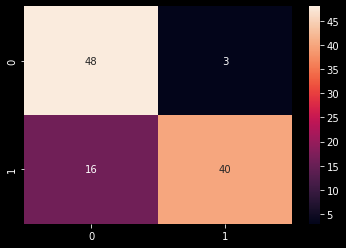

In [10]:
f1_train = f1_score(y_train, train_real_predict)
accuracy_train = accuracy_score(y_train, train_real_predict)
print(f"f1: {f1_train}\naccuracy: {accuracy_train}")
print(classification_report(y_train, train_real_predict))
print("----------------------------------------------")
sns.heatmap(confusion_matrix(y_train, train_real_predict),annot = True,fmt = '2.0f')
print()

In [11]:
test_predict = model.predict(X_test_modified)
test_real_predict = np.argmax(test_predict, axis=1)+1
# for i in range(len(y_test)):
#     print(f"Index:{i}, Predict:{test_real_predict[i]}, Real:{y_test[i]}")

f1: 0.25
accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           1       0.33      0.20      0.25         5
           2       0.75      0.86      0.80        14

    accuracy                           0.68        19
   macro avg       0.54      0.53      0.52        19
weighted avg       0.64      0.68      0.66        19

----------------------------------------------



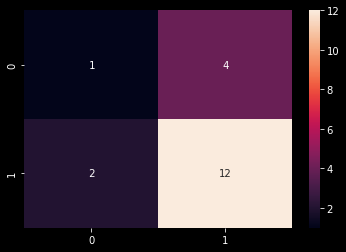

In [12]:
f1_test = f1_score(y_test, test_real_predict)
accuracy_test = accuracy_score(y_test, test_real_predict)
print(f"f1: {f1_test}\naccuracy: {accuracy_test}")
print(classification_report(y_test, test_real_predict))
print("----------------------------------------------")
sns.heatmap(confusion_matrix(y_test, test_real_predict),annot = True,fmt = '2.0f')
print()